In [10]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
import numpy as np
# Please note again that we are using 0 to represent heads, and 1 to represent tails.

## simulate 1 million tests of two fair coin flips

In [2]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 0).mean()


0.249848

### Mathematics verification

In [83]:
p_h = 0.5
p_t = p_h
flips = 2
p_two_heads = p_h**flips
p_two_heads

0.25

In [19]:
# simulate 1 million tests of three fair coin flips
tests = np.random.randint(2, size=(int(1e6), 3))
tests


# sums of all tests
test_sums = tests.sum(axis=1)
test_sums


# proportion of tests that produced exactly one head
# One head on 3 flips = 1 + 0 + 0 = 1
one_head = (test_sums == 1)
one_head
np.bincount(one_head)[1]
(one_head == True).sum()
np.count_nonzero(one_head == True)
#len(test_sums == 1)
p_one_head=np.bincount(one_head)[1]/(np.bincount(one_head)[0]+np.bincount(one_head)[1])
p_one_head


array([[1, 0, 0],
       [1, 1, 1],
       [0, 1, 0],
       ...,
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 0]])

array([1, 3, 1, ..., 3, 1, 2])

array([ True, False,  True, ..., False,  True, False])

374511

374511

374511

0.374511

### Mathematics verification - Binomial Distribution

In [86]:
import math
p_h = 0.5
p_t = p_h
n_flips = 3
k_heads = 1

def binomial_distribution(p, n, k):
    return math.factorial(n) / ( math.factorial(n - k) * math.factorial(k)) * p**k * (1-p)**(n-k)

p_one_head = math.factorial(n_flips) / ( math.factorial(n_flips - k_heads) * math.factorial(k_heads)) * p_h**k_heads * (1-p_h)**(n_flips-k_heads)
p_one_head
binomial_distribution(p_h, n_flips,  k_heads)

0.375

0.375

## Three biased coin flips with P(H) = 0.6 produce exactly one head

In [28]:
# simulate 1 million tests of three biased coin flips
# hint: use np.random.choice()
tests = np.random.choice(a=2, size=(int(1e6), 3), p=[0.4, 0.6])
tests
# sums of all tests
test_sums = tests.sum(axis=1)
test_sums
# proportion of tests that produced exactly one head
one_head = (test_sums == 1)
p_one_head=np.bincount(one_head)[1]/(np.bincount(one_head)[0]+np.bincount(one_head)[1])
p_one_head

array([[1, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [0, 0, 1],
       [1, 1, 0]])

array([1, 1, 2, ..., 2, 1, 2])

0.287802

### Mathematics verification

In [87]:
binomial_distribution(0.6, 3, 1)

0.28800000000000003

## 4. A die rolls an even number

In [75]:
# simulate 1 million tests of one die roll
#tests = np.random.choice(6, size=(int(1e6),1), p=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1])+1
tests = np.random.randint(6, size=(int(1e6),1))+1
tests
tests.min()
tests.max()
tests.mean()
# proportion of tests that produced an even (pair) number
odd = ( tests & 0x1)
odd = odd.flatten()
odd
even_odd = np.bincount(odd)
even_odd
odd_number = even_odd[0]
odd_number
even_number = even_odd[1]
even_number
p_even = even_number / (even_number + odd_number)
p_even

array([[2],
       [4],
       [5],
       ...,
       [5],
       [4],
       [1]])

1

6

3.497716

array([0, 0, 1, ..., 1, 0, 1])

array([499048, 500952])

499048

500952

0.500952

### Mathematics verification

In [88]:
# 1 , 2, 3, 4, 5, 6
p_even = 3/6
p_even

0.5

## 5. Two dice roll a double

In [81]:
# simulate the first million die rolls
first = np.random.randint(6, size=(int(1e6),1))+1

# simulate the second million die rolls
second = np.random.randint(6, size=(int(1e6),1))+1

# proportion of tests where the 1st and 2nd die rolled the same number
tests = (first == second).flatten()
np.bincount(tests)
p_same = np.bincount(tests)[1] / (np.bincount(tests)[1] + np.bincount(tests)[0])
p_same

array([833786, 166214])

0.166214

In [80]:
np.bincount([True, False, False])
np.bincount([False, True, False])
np.bincount([True, True, False])

array([2, 1])

array([2, 1])

array([1, 2])

### Mathematics verification

In [92]:
# It's the probability to roll a given number (the number of the first roll)
p_same = 1/6
p_same

0.16666666666666666

# Simulating Many Coin Flips

In [94]:
# number of heads from 10 fair coin flips
np.random.binomial(10, 0.5)

5

In [95]:
# results from 20 tests with 10 coin flips
np.random.binomial(10, 0.5, 20)

array([5, 5, 4, 3, 3, 4, 5, 2, 7, 4, 5, 5, 5, 7, 8, 6, 6, 7, 2, 5])

In [103]:
# mean number of heads from the 20 tests
np.random.binomial(10, 0.5, 20).mean()

5.05

In [105]:
# reflects the fairness of the coin more closely as # tests increases
np.random.binomial(10, 0.5, 1000000).mean()

2.497954

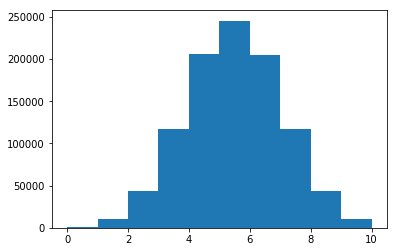

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(np.random.binomial(10, 0.5, 1000000));

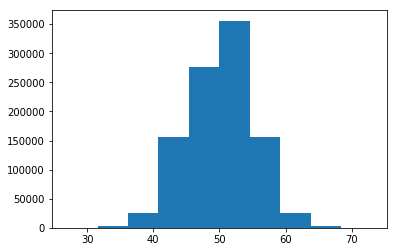

In [109]:
# gets more narrow as number of flips increase per test
plt.hist(np.random.binomial(100, 0.5, 1000000));

# Binomial Distributions

In [110]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.500219

In [118]:
p_h=1/2
p_h

0.5

In [112]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5, 0.5, int(1e6))
tests
# proportion of tests that produced 1 head
(tests == 1).mean()

array([2, 3, 1, ..., 2, 1, 2])

0.156102

In [119]:
binomial_distribution(0.5, 5, 1)

0.15625

In [113]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10, 0.5, int(1e6))

# proportion of tests that produced 4 heads
(tests == 4).mean()

0.20489

In [120]:
binomial_distribution(p=0.5, n=10, k=4)

0.205078125

In [117]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5, 0.8, int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

0.32825

In [121]:
binomial_distribution(0.8, 5, 5)

0.3276800000000001

In [116]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10, 0.15, int(1e6))

# proportion of tests that produced at least 3 heads
(tests >= 3).mean()

0.18038

In [128]:
p_h = 0
for heads in range(3,10+1):
    p_heads = binomial_distribution(0.15, 10, heads)
    p_h += p_heads
    print("Prob of ", heads, ":", p_heads, " Total :", p_h)
p_h

Prob of  3 : 0.1298337207539062  Total : 0.1298337207539062
Prob of  4 : 0.0400957078798828  Total : 0.16992942863378901
Prob of  5 : 0.008490855786328123  Total : 0.17842028442011715
Prob of  6 : 0.001248655262695312  Total : 0.17966893968281247
Prob of  7 : 0.00012591481640624995  Total : 0.17979485449921873
Prob of  8 : 8.332598144531246e-06  Total : 0.17980318709736326
Prob of  9 : 3.267685546874999e-07  Total : 0.17980351386591795
Prob of  10 : 5.7665039062499975e-09  Total : 0.17980351963242186


0.17980351963242186

# Cancer Test Results

In [151]:
import pandas as pd
# load dataset
df = pd.read_csv("cancer_test_data.csv")
df.head(3)
patients = len(df)
print("# number of patients",patients)

with_cancer = len(df[(df['has_cancer'] == True)])
print("number of patients with cancer", with_cancer)
no_cancer = len(df[(df['has_cancer'] == False)])
print("number of patients without cancer", no_cancer)
print("proportion of patients with cancer", with_cancer / patients)
print("proportion of patients without cancer", no_cancer / patients)
pos_test_with_cancer = len(
    df[(df['has_cancer'] == True)
       & (df['test_result'] == 'Positive')]
                  )
print("proportion of patients with cancer who test positive", pos_test_with_cancer / with_cancer)
neg_test_with_cancer = len(    df[(df['has_cancer'] == True)   & (df['test_result'] == 'Negative')]         )
print("proportion of patients with cancer who test negative",neg_test_with_cancer / with_cancer)
pos_test_no_cancer = len(    df[(df['has_cancer'] == False)   & (df['test_result'] == 'Positive')]         )
print("proportion of patients without cancer who test positive",pos_test_no_cancer / no_cancer)
neg_test_no_cancer = len(    df[(df['has_cancer'] == False)   & (df['test_result'] == 'Negative')]         )
print("proportion of patients without cancer who test negative",neg_test_no_cancer / no_cancer)

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False


# number of patients 2914
number of patients with cancer 306
number of patients without cancer 2608
proportion of patients with cancer 0.10501029512697323
proportion of patients without cancer 0.8949897048730268
proportion of patients with cancer who test positive 0.9052287581699346
proportion of patients with cancer who test negative 0.09477124183006536
proportion of patients without cancer who test positive 0.2036042944785276
proportion of patients without cancer who test negative 0.7963957055214724


# Conditional Probability & Bayes Rule Quiz
In the previous section, you found the following proportions from the cancer results dataset.

    Patients with cancer: 0.105
    Patients without cancer: 0.895
    Patients with cancer who tested positive: 0.905
    Patients with cancer who tested negative: 0.095
    Patients without cancer who tested positive: 0.204
    Patients without cancer who tested negative: 0.796

    Based on the above proportions observed in the data, we can assume the following probabilities.
    Probability 	Meaning
    P(cancer) = 0.105 	Probability a patient has cancer
    P(~cancer) = 0.895 	Probability a patient does not have cancer
    P(positive|cancer) = 0.905 	Probability a patient with cancer tests positive
    P(negative|cancer) = 0.095 	Probability a patient with cancer tests negative
    P(positive|~cancer) = 0.204 	Probability a patient without cancer tests positive
    P(negative|~cancer) = 0.796 	Probability a patient without cancer tests negative

In [160]:
p_cancer = 0.105
p_no_cancer = 0.895
p_pos_when_cancer = 0.905
p_pos_whithout_cancer = 0.204
p_pos_and_no_cancer = p_pos_whithout_cancer * p_no_cancer
p_cancer_and_pos = p_pos_when_cancer * p_cancer
p_pos = p_cancer * p_pos_when_cancer + p_no_cancer * p_pos_whithout_cancer
p_cancer_when_pos = p_cancer_and_pos / p_pos
print("Probability a patient who tested positive has cancer, or P(cancer|positive)", p_cancer_when_pos)
p_no_cancer_when_pos = p_pos_and_no_cancer / p_pos
print("Probability a patient who tested positive doesn't have cancer, or P(~cancer|positive)", p_no_cancer_when_pos)

p_neg_given_cancert = 0.095
p_neg_given_no_cancert = 0.796
p_neg = p_cancer * p_neg_given_cancert + p_no_cancer * p_neg_given_no_cancert
p_neg_and_cancer = p_cancer * p_neg_given_cancert
p_cancer_when_neg = p_neg_and_cancer / p_neg
print("Probability a patient who tested negative has cancer, or P(cancer|negative)", p_cancer_when_neg)
p_neg_and_no_cancer = p_neg_given_no_cancert * p_no_cancer
p_no_cancer_when_neg = p_neg_and_no_cancer / p_neg
print("Probability a patient who tested negative doesn't have cancer, or P(~cancer|negative)", p_no_cancer_when_neg)


Probability a patient who tested positive has cancer, or P(cancer|positive) 0.34230291241151994
Probability a patient who tested positive doesn't have cancer, or P(~cancer|positive) 0.65769708758848
Probability a patient who tested negative has cancer, or P(cancer|negative) 0.013808235106832134
Probability a patient who tested negative doesn't have cancer, or P(~cancer|negative) 0.986191764893168


## Or more simple

In [159]:
df.query('test_result == "Negative"')['has_cancer'].mean()

0.013770180436847104

# Normal Distribution

# Sampling Distribution

In [192]:
import numpy as np
np.random.seed(42)

students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])
print("Find the proportion of students who drink coffee in the above array. Store this value in a variable p.")
p = (students == 1).sum() / students.shape[0]
p
print("Use numpy's random.choice to simulate 5 draws from the students array. What is proportion of your sample drink coffee?")
indexes = np.random.choice(students, size=5)
sample = students[indexes]
p_sample = (sample == 1).sum() / sample.shape[0]
p_sample
print("Repeat the above to obtain 10,000 additional proportions, where each sample was of size 5. Store these in a variable called sample_props.")
sample_props = np.random.choice(students, size=(10000,5))
sample_props
print("What is the mean proportion of all 10,000 of these proportions? This is often called the mean of the sampling distribution.")
sample_props.mean()
print("What are the variance and standard deviation for the original 21 data values?")
students.mean()
students.var()
students.std()
print("What are the variance and standard deviation for the 10,000 proportions you created?")
sample_props.mean()
sample_props.var()
sample_props.std()
print("7.Compute p(1-p), which of your answers does this most closely match?")
1-p


print("8. Compute p(1-p)/n, which of your answers does this most closely match?")

print("9. Notice that your answer to 8. is commonly called the variance of the sampling distribution. If you were to change your first sample to be 20, what would this do for the variance of the sampling distribution? Simulate and calculate the new answers in 6. and 8. to check that the consistency you found before still holds.")


print("10. Finally, plot a histgram of the 10,000 draws from both the proportions with a sample size of 5 and the proportions with a sample size of 20. Each of these distributions is a sampling distribution. One is for the proportions of sample size 5 and the other a sampling distribution for proportions with sample size 20.")
print("")
print("")
print("")
print("")
print("")
print("")

Find the proportion of students who drink coffee in the above array. Store this value in a variable p.


0.7142857142857143

Use numpy's random.choice to simulate 5 draws from the students array. What is proportion of your sample drink coffee?


0.4

Repeat the above to obtain 10,000 additional proportions, where each sample was of size 5. Store these in a variable called sample_props.


array([[0, 0, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       ...,
       [0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1]])

What is the mean proportion of all 10,000 of these proportions? This is often called the mean of the sampling distribution.


0.714

What are the variance and standard deviation for the original 21 data values?


0.7142857142857143

0.20408163265306126

0.45175395145262565

What are the variance and standard deviation for the 10,000 proportions you created?


0.714

0.20420400000000002

0.45188936699152377

7.Compute p(1-p), which of your answers does this most closely match?


0.2857142857142857

8. Compute p(1-p)/n, which of your answers does this most closely match?
9. Notice that your answer to 8. is commonly called the variance of the sampling distribution. If you were to change your first sample to be 20, what would this do for the variance of the sampling distribution? Simulate and calculate the new answers in 6. and 8. to check that the consistency you found before still holds.
10. Finally, plot a histgram of the 10,000 draws from both the proportions with a sample size of 5 and the proportions with a sample size of 20. Each of these distributions is a sampling distribution. One is for the proportions of sample size 5 and the other a sampling distribution for proportions with sample size 20.








In [181]:
print("")

0.6

In [171]:
print("")

21

In [ ]:
print("")